# PROBLEM STATEMENT 
A time series-based regression dataset, that has 21 input features and 1 target variable. Each 
check point represents the number cycles that have been rented from that particular 
checkpoint on the corresponding date and target is the sum of number of cycles that have 
been rented on that particular date. In addition to that you are also provided with weather data 
of the particular city. Also all the check points are in a single city for which weather data is 
provided

In [24]:
import pandas as pd

# Read the first Excel file into a DataFrame, explicitly parse Date and Time columns as datetime

df1 = pd.read_excel(r'C:\Users\admin\Downloads\Checkpoint_count.xlsx' , parse_dates={'Date/Time': ['Date', 'Time']})

# Read the second Excel file into another DataFrame
df2 = pd.read_excel(r'C:\Users\admin\Downloads\weather.xlsx' , skiprows=2)

# Merge the DataFrames based on the common "Date/Time" column
merged_df = pd.merge(df1, df2, on='Date/Time', how='inner')

# Display the merged DataFrame
print(merged_df.head())


   Date/Time  check_point0  check_point1  check_point2  check_point3  \
0 2015-01-01            58            12             4            17   
1 2015-02-01            75             7             5            15   
2 2015-03-01            79             7             3             7   
3 2015-04-01            10             1            21             0   
4 2015-05-01            42             0             2             0   

   check_point4  check_point5  check_point6  check_point7  check_point8  ...  \
0          33.0            49            21            16            16  ...   
1          30.0           113            27             9            32  ...   
2          30.0           107            36            12            18  ...   
3          10.0            35            29             1             0  ...   
4          27.0            90            21             1             1  ...   

   Total Snow (cm)  Total Snow Flag  Total Precip (mm)  Total Precip Flag  \
0        

In [27]:
#Importing important Libraries:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
#checking for null values
merged_df.isnull().sum()

Date/Time                      0
check_point0                   0
check_point1                   0
check_point2                   0
check_point3                   0
check_point4                 257
check_point5                   0
check_point6                   0
check_point7                   0
check_point8                   0
check_point9                 267
check_point10                  0
check_point11                110
check_point12                  0
check_point13                  0
check_point14                  0
check_point15                  0
check_point16                269
check_point17                  0
check_point18                  0
check_point19                  0
check_point20                  0
Year                           0
Month                          0
Day                            0
Data Quality                   0
Max Temp (°C)                  0
Max Temp Flag                319
Min Temp (°C)                  0
Min Temp Flag                318
Mean Temp 

<AxesSubplot:>

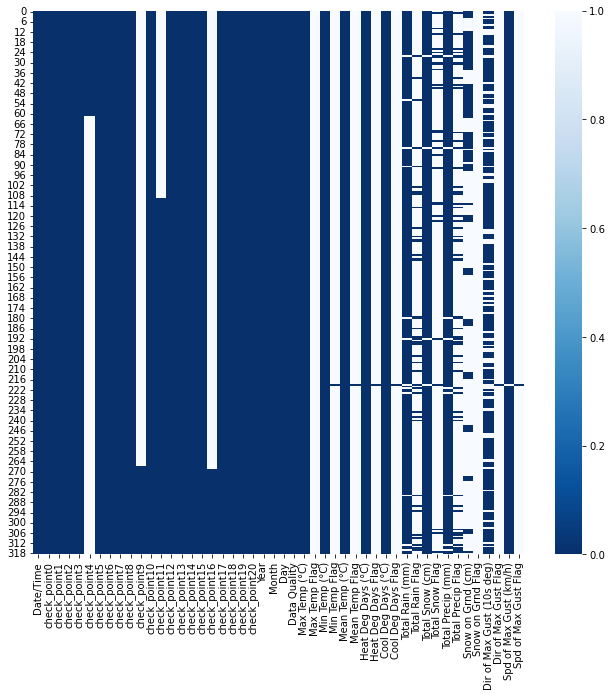

In [33]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(merged_df.isna(), cmap='Blues_r')

In [35]:
## Checking the dimension of the dataset
merged_df.shape

(319, 48)

In [36]:
#column counts in the datset
merged_df.columns.value_counts().sum()

48

In [39]:
## loading  all  the  columns  names  here    
merged_df.columns

Index(['Date/Time', 'check_point0', 'check_point1', 'check_point2',
       'check_point3', 'check_point4', 'check_point5', 'check_point6',
       'check_point7', 'check_point8', 'check_point9', 'check_point10',
       'check_point11', 'check_point12', 'check_point13', 'check_point14',
       'check_point15', 'check_point16', 'check_point17', 'check_point18',
       'check_point19', 'check_point20', 'Year', 'Month', 'Day',
       'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)',
       'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)',
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [40]:
#Getting the Unique values from the columns
merged_df.nunique()

Date/Time                    319
check_point0                 307
check_point1                 231
check_point2                 260
check_point3                 254
check_point4                  54
check_point5                 292
check_point6                 273
check_point7                 254
check_point8                 264
check_point9                  51
check_point10                227
check_point11                201
check_point12                298
check_point13                306
check_point14                294
check_point15                209
check_point16                 50
check_point17                274
check_point18                302
check_point19                302
check_point20                237
Year                           1
Month                         12
Day                           30
Data Quality                   1
Max Temp (°C)                219
Max Temp Flag                  0
Min Temp (°C)                227
Min Temp Flag                  1
Mean Temp 

# Getting the basic summary and statistical information of the data.

In [41]:
# To get good overview of the dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 318
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  319 non-null    datetime64[ns]
 1   check_point0               319 non-null    int64         
 2   check_point1               319 non-null    int64         
 3   check_point2               319 non-null    int64         
 4   check_point3               319 non-null    int64         
 5   check_point4               62 non-null     float64       
 6   check_point5               319 non-null    int64         
 7   check_point6               319 non-null    int64         
 8   check_point7               319 non-null    int64         
 9   check_point8               319 non-null    int64         
 10  check_point9               52 non-null     float64       
 11  check_point10              319 non-null    int64         
 12  check_po

In [42]:
merged_df.describe()

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,...,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg)
count,319.000000,319.000000,319.000000,319.000000,62.000000,319.000000,319.000000,319.000000,319.000000,52.000000,...,319.000000,319.000000,319.000000,319.000000,307.000000,315.000000,310.00000,96.000000,0.0,247.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,89.935484,2208.031348,1011.175549,1137.316614,1754.257053,2090.250000,...,2.744828,7.739498,11.286834,1.026332,2.432573,0.412698,2.84000,10.031250,NaN,20.550607
std,2276.281648,1832.808709,2337.531344,960.020397,51.886974,2452.475658,917.450049,991.065590,1415.004315,972.740577,...,13.174848,13.207652,12.140367,1.952598,6.438770,1.523603,6.46808,6.726934,NaN,9.031813
min,10.000000,0.000000,0.000000,0.000000,10.000000,2.000000,8.000000,0.000000,0.000000,0.000000,...,-27.500000,-20.900000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,1.000000
25%,387.500000,3.500000,33.000000,54.500000,46.500000,214.500000,119.000000,25.500000,61.000000,1275.000000,...,-6.000000,-1.750000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,NaN,17.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,85.000000,689.000000,1049.000000,1067.000000,1787.000000,2258.000000,...,5.200000,10.200000,7.800000,0.000000,0.000000,0.000000,0.00000,10.500000,NaN,23.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,131.500000,4114.500000,1675.000000,2094.500000,3025.500000,2775.500000,...,14.050000,19.300000,19.750000,1.300000,1.000000,0.000000,2.40000,16.000000,NaN,26.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,207.000000,7905.000000,9999.000000,3035.000000,4867.000000,3997.000000,...,21.900000,27.100000,38.900000,9.100000,47.200000,17.000000,47.20000,23.000000,NaN,36.000000


In [43]:
merged_df= merged_df.drop(columns=['check_point4'])


In [44]:
merged_df


,Date/Time,check_point0,check_point1,check_point2,check_point3,check_point5,check_point6,check_point7,check_point8,check_point9,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,58,12,4,17,49,21,16,16,NaN,...,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,2015-02-01,75,7,5,15,113,27,9,32,NaN,...,0.0,T,0.0,T,14.0,NaN,5.0,NaN,35,NaN
2,2015-03-01,79,7,3,7,107,36,12,18,NaN,...,0.2,NaN,0.2,NaN,14.0,NaN,NaN,NaN,<31,NaN
3,2015-04-01,10,1,21,0,35,29,1,0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,24.0,NaN,43,NaN
4,2015-05-01,42,0,2,0,90,21,1,1,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,3044,1931,2828,1393,3603,1754,1142,2342,3997.0,...,0.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,<31,NaN
315,2015-12-11,1751,930,1670,888,2048,700,675,1566,2945.0,...,0.0,NaN,0.0,T,NaN,NaN,25.0,NaN,70,NaN
316,2015-11-13,1818,906,1711,873,2115,634,477,1522,1693.0,...,0.0,NaN,NaN,M,NaN,NaN,24.0,NaN,48,NaN
317,2015-11-14,979,759,978,322,1112,290,310,601,604.0,...,0.0,T,0.0,T,0.0,NaN,26.0,NaN,50,NaN


In [45]:
merged_df= merged_df.drop(columns=['check_point9'])

In [46]:
merged_df= merged_df.drop(columns=['check_point11'])
merged_df= merged_df.drop(columns=['check_point17'])
merged_df= merged_df.drop(columns=['Max Temp Flag'])
merged_df= merged_df.drop(columns=['Min Temp Flag'])
merged_df= merged_df.drop(columns=['Mean Temp Flag'])
merged_df= merged_df.drop(columns=['Heat Deg Days Flag'])
merged_df= merged_df.drop(columns=['Cool Deg Days Flag'])
merged_df= merged_df.drop(columns=['Snow on Grnd Flag'])
merged_df= merged_df.drop(columns=['Spd of Max Gust Flag'])
merged_df= merged_df.drop(columns=['check_point16'])
merged_df= merged_df.drop(columns=['Total Precip Flag'])
merged_df= merged_df.drop(columns=['Total Snow Flag'])

merged_df= merged_df.drop(columns=['Spd of Max Gust (km/h)'])
merged_df= merged_df.drop(columns=['Total Snow (cm)'])
merged_df= merged_df.drop(columns=['Total Precip (mm)'])
merged_df= merged_df.drop(columns=['Dir of Max Gust Flag'])


In [47]:
merged_df

,Date/Time,check_point0,check_point1,check_point2,check_point3,check_point5,check_point6,check_point7,check_point8,check_point10,...,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Rain Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg)
0,2015-01-01,58,12,4,17,49,21,16,16,7,...,‡,-3.0,-7.6,-5.3,23.3,0.0,0.0,NaN,0.0,22.0
1,2015-02-01,75,7,5,15,113,27,9,32,11,...,‡,-14.2,-20.2,-17.2,35.2,0.0,0.0,NaN,14.0,5.0
2,2015-03-01,79,7,3,7,107,36,12,18,2,...,‡,-3.4,-17.3,-10.4,28.4,0.0,0.0,NaN,14.0,NaN
3,2015-04-01,10,1,21,0,35,29,1,0,0,...,‡,2.0,-6.7,-2.4,20.4,0.0,0.0,NaN,0.0,24.0
4,2015-05-01,42,0,2,0,90,21,1,1,6,...,‡,19.3,7.6,13.5,4.5,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,3044,1931,2828,1393,3603,1754,1142,2342,458,...,‡,10.8,4.0,7.4,10.6,0.0,0.2,NaN,NaN,NaN
315,2015-12-11,1751,930,1670,888,2048,700,675,1566,152,...,‡,14.0,6.4,10.2,7.8,0.0,0.0,T,NaN,25.0
316,2015-11-13,1818,906,1711,873,2115,634,477,1522,150,...,‡,9.4,0.9,5.2,12.8,0.0,NaN,M,NaN,24.0
317,2015-11-14,979,759,978,322,1112,290,310,601,98,...,‡,4.1,-0.2,2.0,16.0,0.0,0.0,NaN,0.0,26.0


In [48]:
merged_df['Total Rain (mm)'].fillna(merged_df['Total Rain (mm)'].mean(), inplace=True)




In [49]:


merged_df['Snow on Grnd (cm)'].fillna(method='ffill', inplace=True)

merged_df['Dir of Max Gust (10s deg)'].fillna(method='ffill', inplace=True)










<AxesSubplot:>

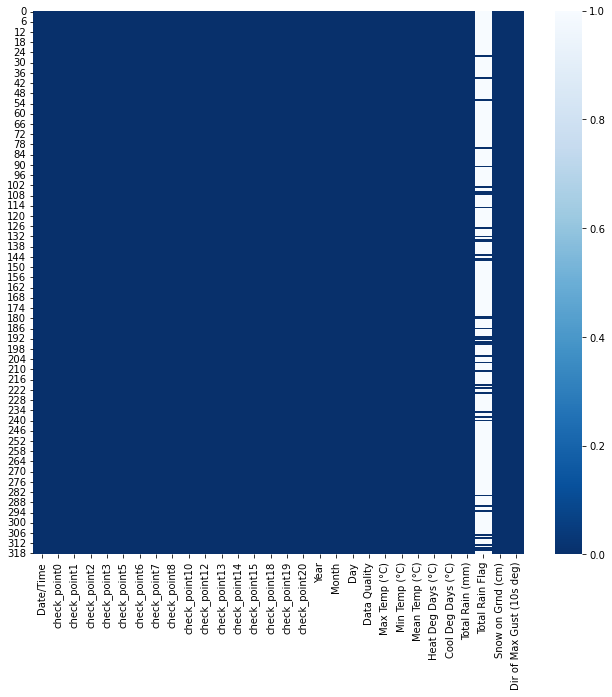

In [50]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(merged_df.isna(), cmap='Blues_r')

In [51]:
#checking for null values
merged_df.isnull().sum()

Date/Time                      0
check_point0                   0
check_point1                   0
check_point2                   0
check_point3                   0
check_point5                   0
check_point6                   0
check_point7                   0
check_point8                   0
check_point10                  0
check_point12                  0
check_point13                  0
check_point14                  0
check_point15                  0
check_point18                  0
check_point19                  0
check_point20                  0
Year                           0
Month                          0
Day                            0
Data Quality                   0
Max Temp (°C)                  0
Min Temp (°C)                  0
Mean Temp (°C)                 0
Heat Deg Days (°C)             0
Cool Deg Days (°C)             0
Total Rain (mm)                0
Total Rain Flag              279
Snow on Grnd (cm)              0
Dir of Max Gust (10s deg)      0
dtype: int

In [52]:
merged_df['Total Rain Flag'].fillna(method='ffill', inplace=True)

In [53]:
#checking for null values
merged_df.isnull().sum()


Date/Time                     0
check_point0                  0
check_point1                  0
check_point2                  0
check_point3                  0
check_point5                  0
check_point6                  0
check_point7                  0
check_point8                  0
check_point10                 0
check_point12                 0
check_point13                 0
check_point14                 0
check_point15                 0
check_point18                 0
check_point19                 0
check_point20                 0
Year                          0
Month                         0
Day                           0
Data Quality                  0
Max Temp (°C)                 0
Min Temp (°C)                 0
Mean Temp (°C)                0
Heat Deg Days (°C)            0
Cool Deg Days (°C)            0
Total Rain (mm)               0
Total Rain Flag              26
Snow on Grnd (cm)             0
Dir of Max Gust (10s deg)     0
dtype: int64

<AxesSubplot:>

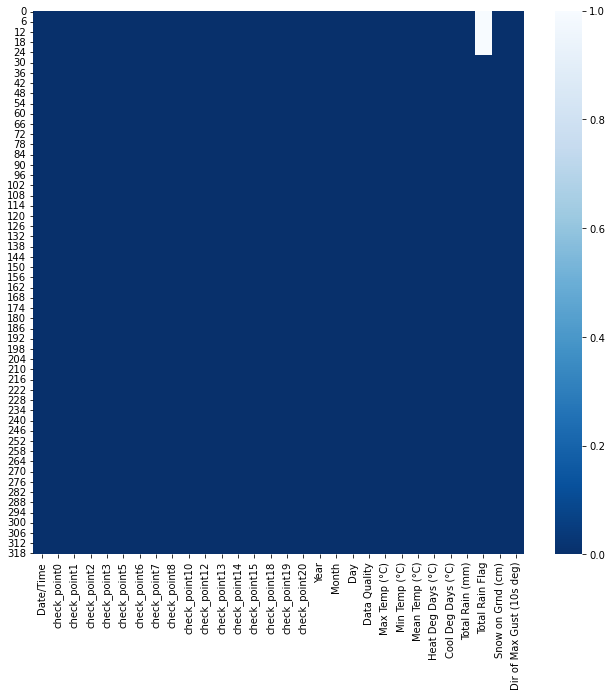

In [54]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(merged_df.isna(), cmap='Blues_r')

In [55]:
#In time series data, you can use forward fill (ffill) or backward fill (bfill) to propagate the last observed value forward or the next observed value backward.

merged_df['Total Rain Flag'].fillna(method='bfill', inplace=True)




In [56]:
#checking for null values
merged_df.isnull().sum()

Date/Time                    0
check_point0                 0
check_point1                 0
check_point2                 0
check_point3                 0
check_point5                 0
check_point6                 0
check_point7                 0
check_point8                 0
check_point10                0
check_point12                0
check_point13                0
check_point14                0
check_point15                0
check_point18                0
check_point19                0
check_point20                0
Year                         0
Month                        0
Day                          0
Data Quality                 0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Heat Deg Days (°C)           0
Cool Deg Days (°C)           0
Total Rain (mm)              0
Total Rain Flag              0
Snow on Grnd (cm)            0
Dir of Max Gust (10s deg)    0
dtype: int64

# Exploration of the dataset (EDA )

In [64]:
## loading  all  the  columns  names  here 
merged_df.columns

Index(['Date/Time', 'check_point0', 'check_point1', 'check_point2',
       'check_point3', 'check_point5', 'check_point6', 'check_point7',
       'check_point8', 'check_point10', 'check_point12', 'check_point13',
       'check_point14', 'check_point15', 'check_point18', 'check_point19',
       'check_point20', 'Year', 'Month', 'Day', 'Data Quality',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Rain Flag', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)'],
      dtype='object')

In [58]:
merged_df['Max Temp (°C)'].value_counts()

28.7    6
24.0    4
24.7    3
4.1     3
23.1    3
       ..
13.5    1
5.7     1
14.3    1
16.3    1
7.5     1
Name: Max Temp (°C), Length: 219, dtype: int64

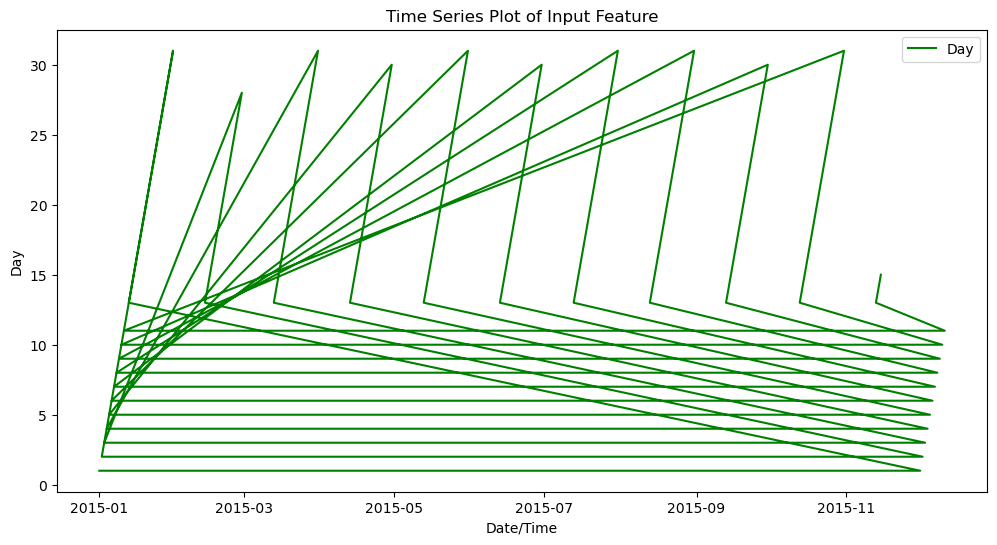

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Replace 'InputFeature' with the name of the feature you want to plot
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date/Time'], merged_df['Day'], label='Day', color='green')
plt.xlabel('Date/Time')
plt.ylabel('Day')
plt.title('Time Series Plot of Input Feature')
plt.legend()
plt.show()


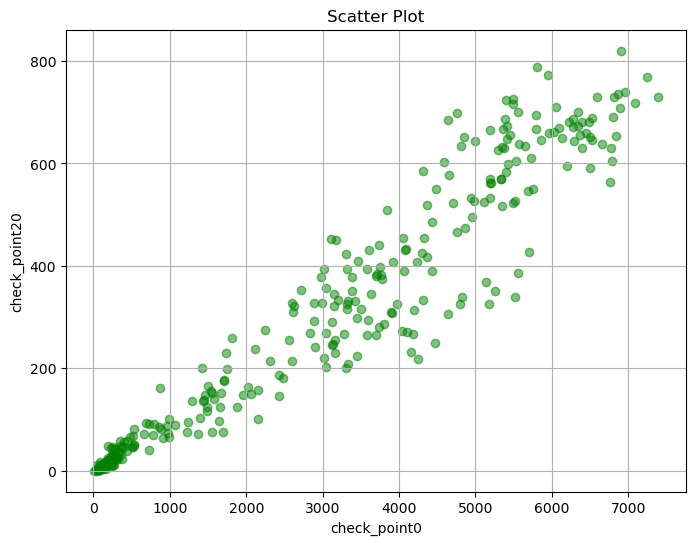

In [63]:


plt.figure(figsize=(8, 6))
plt.scatter(merged_df['check_point0'], merged_df['check_point20'], alpha=0.5, color='green')
plt.xlabel('check_point0')
plt.ylabel('check_point20')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()


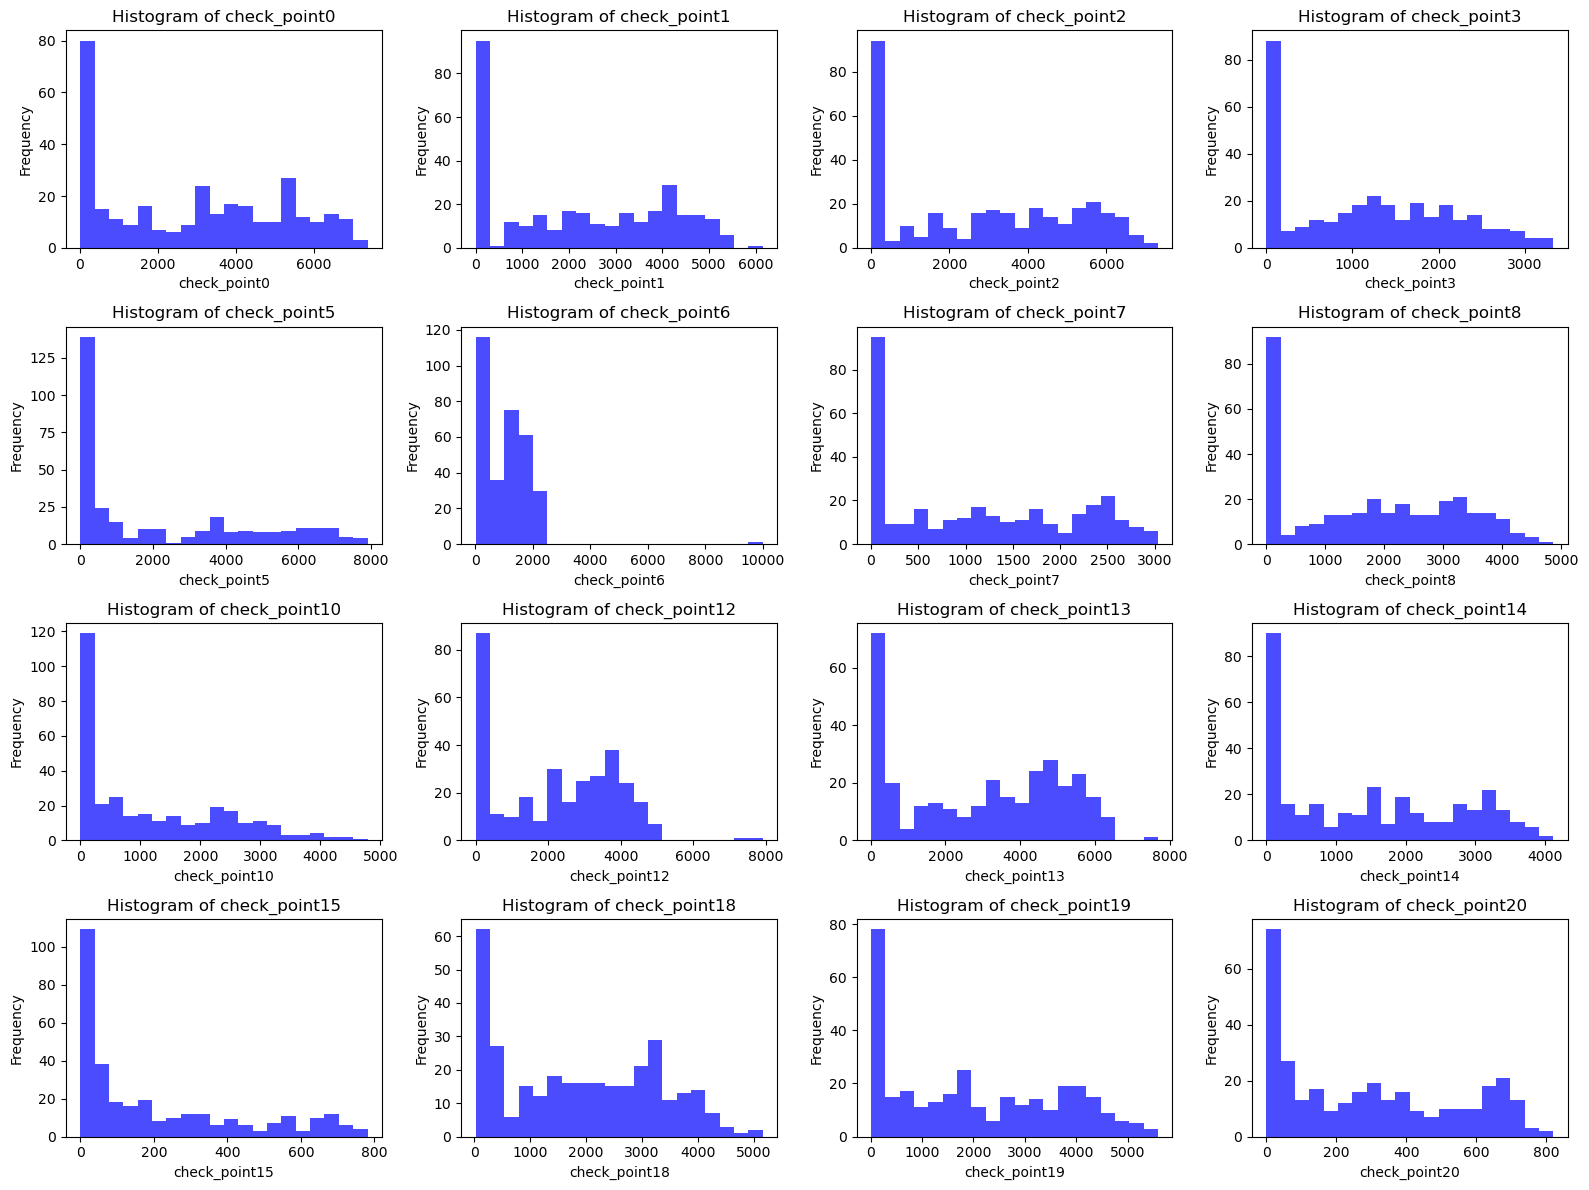

In [70]:
import matplotlib.pyplot as plt

# List of checkpoint columns you want to create histograms for
checkpoint_columns = [
    'check_point0', 'check_point1', 'check_point2',
    'check_point3', 'check_point5', 'check_point6',
    'check_point7', 'check_point8', 'check_point10',
    'check_point12', 'check_point13', 'check_point14',
    'check_point15', 'check_point18', 'check_point19','check_point20'
]

# Create subplots for each checkpoint column
plt.figure(figsize=(16, 12))
for i, column in enumerate(checkpoint_columns):
    plt.subplot(4, 4, i + 1)  # Adjust the subplot grid as needed
    plt.hist(merged_df[column], bins=20, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


In [76]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [ ]:
X = data[['feature1', 'feature2', '...']]
y = data['target']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
